
#### **Rossmann Store Sales Prediction**
##### This project aims to predict daily sales for Rossmann stores using historical sales data, store characteristics, promotions, and other relevant factors. The project will involve data cleaning, exploratory data analysis (EDA), feature engineering, model building, and prediction.

### **1.Project Definition and Objectives**
**Objective** 
- To predict daily sales for Rossmann stores based on historical data and various features such as store type, promotions, and competition.

**Goals**
- Understand the key factors that influence sales in retail stores.
- Build a predictive model that can accurately forecast sales for Rossmann stores.
- Identify actionable insights for improving sales based on model predictions.

**DataSets**
- train.csv: Historical sales data.
- store.csv: Store-related features.
- test.csv: Data for making predictions.
- sample_submission.csv: Example submission format.

### **Creating enviroment**

-------------------------------------------------------------------------------------------------------------------

### **2.Data Lodaing, Cleaning and preproccessing**

**Loading Data** 
- Import all datasets into pandas DataFrames.



In [1]:
import os
print(os.getcwd())


/Users/mustafaaldabbas/Documents/GitHub/Rossmann-sales-prediction


In [6]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('/Users/mustafaaldabbas/Documents/GitHub/Rossmann-sales-prediction/Datasets/Raw/train.csv')
store_df = pd.read_csv('/Users/mustafaaldabbas/Documents/GitHub/Rossmann-sales-prediction/Datasets/Raw/store.csv')
test_df = pd.read_csv('/Users/mustafaaldabbas/Documents/GitHub/Rossmann-sales-prediction/Datasets/Raw/test.csv')



/var/folders/dc/ldz3k5913l3gjmcgcw60g3x80000gp/T/ipykernel_24385/2427059715.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('/Users/mustafaaldabbas/Documents/GitHub/Rossmann-sales-prediction/Datasets/Raw/train.csv')


In [7]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


**Missing Values**
- Identify and impute missing values or remove columns/rows with excessive missing data.



In [8]:
# Check for missing values in each dataset
missing_train = train_df.isnull().sum()
missing_store = store_df.isnull().sum()
missing_test = test_df.isnull().sum()

# Filter to only show columns with missing values
missing_train = missing_train[missing_train > 0]
missing_store = missing_store[missing_store > 0]
missing_test = missing_test[missing_test > 0]

print("Missing values in train_df:")
print(missing_train)

print("\nMissing values in store_df:")
print(missing_store)

print("\nMissing values in test_df:")
print(missing_test)


Missing values in train_df:
Series([], dtype: int64)

Missing values in store_df:
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Missing values in test_df:
Open    11
dtype: int64


In [9]:
# Handle missing values in store_df
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace=True)
store_df['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
store_df['CompetitionOpenSinceYear'].fillna(0, inplace=True)
store_df['Promo2SinceWeek'].fillna(0, inplace=True)
store_df['Promo2SinceYear'].fillna(0, inplace=True)
store_df['PromoInterval'].fillna('None', inplace=True)

# Handle missing values in test_df
test_df['Open'].fillna(test_df['Open'].mode()[0], inplace=True)

# Verify that there are no remaining missing values
missing_store_after = store_df.isnull().sum()
missing_test_after = test_df.isnull().sum()

print("Remaining missing values in store_df:")
print(missing_store_after[missing_store_after > 0])

print("\nRemaining missing values in test_df:")
print(missing_test_after[missing_test_after > 0])



Remaining missing values in store_df:
Series([], dtype: int64)

Remaining missing values in test_df:
Series([], dtype: int64)


**Data Type**
- Convert date columns to datetime and categorical variables to appropriate types.
- ensure categorical Variables are Properly Formatted. 



In [10]:
# Convert Date columns to datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

# Ensure categorical variables are properly formatted
train_df['StateHoliday'] = train_df['StateHoliday'].astype('category')
train_df['Store'] = train_df['Store'].astype('category')
train_df['DayOfWeek'] = train_df['DayOfWeek'].astype('category')
train_df['Promo'] = train_df['Promo'].astype('category')
train_df['SchoolHoliday'] = train_df['SchoolHoliday'].astype('category')

store_df['Store'] = store_df['Store'].astype('category')
store_df['StoreType'] = store_df['StoreType'].astype('category')
store_df['Assortment'] = store_df['Assortment'].astype('category')
store_df['PromoInterval'] = store_df['PromoInterval'].astype('category')

test_df['StateHoliday'] = test_df['StateHoliday'].astype('category')
test_df['Store'] = test_df['Store'].astype('category')
test_df['DayOfWeek'] = test_df['DayOfWeek'].astype('category')
test_df['Promo'] = test_df['Promo'].astype('category')
test_df['SchoolHoliday'] = test_df['SchoolHoliday'].astype('category')

# Display the dtypes to confirm the changes
print("Data types in train_df after conversion:")
print(train_df.dtypes)

print("\nData types in store_df after conversion:")
print(store_df.dtypes)

print("\nData types in test_df after conversion:")
print(test_df.dtypes)


Data types in train_df after conversion:
Store                  category
DayOfWeek              category
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                  category
StateHoliday           category
SchoolHoliday          category
dtype: object

Data types in store_df after conversion:
Store                        category
StoreType                    category
Assortment                   category
CompetitionDistance           float64
CompetitionOpenSinceMonth     float64
CompetitionOpenSinceYear      float64
Promo2                          int64
Promo2SinceWeek               float64
Promo2SinceYear               float64
PromoInterval                category
dtype: object

Data types in test_df after conversion:
Id                        int64
Store                  category
DayOfWeek              category
Date             datetime64[ns]
Open                    float64
Promo               

**Outliers** 
- Visualize the Sales Data Using BOxplot and Histograms
- Identify Outlier using Qq_1.5 or Above Q3+1.5* IQR
- Remove Outliers 



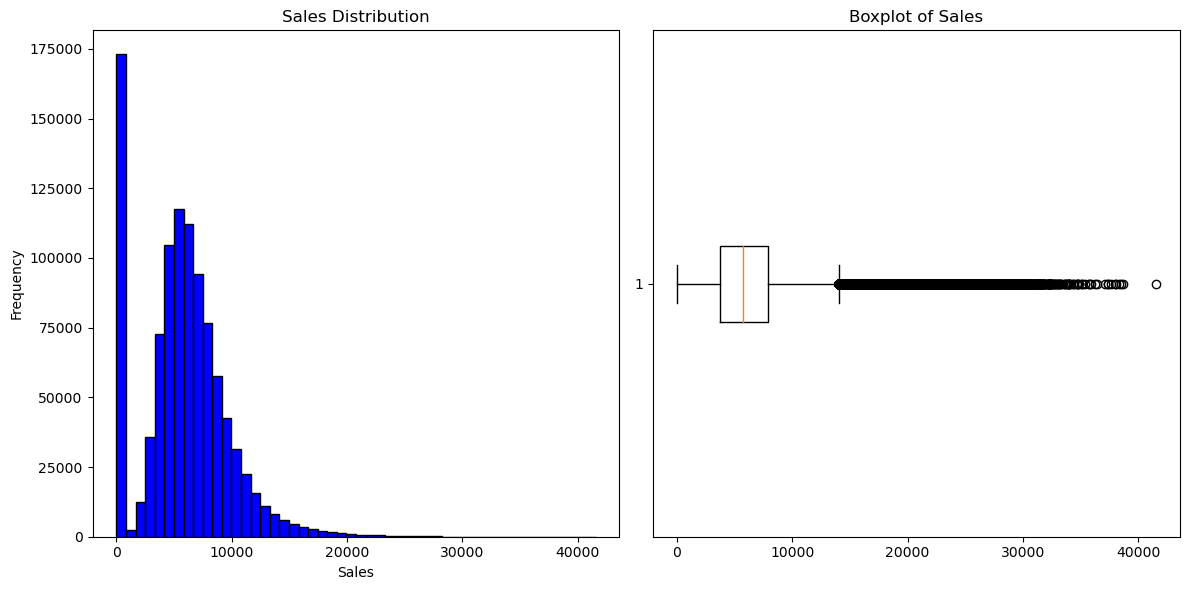

Number of rows before removing outliers: 1017209
Number of rows after removing outliers: 990515


In [11]:
import matplotlib.pyplot as plt

# Step 1: Visualize the Sales Data
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(train_df['Sales'], bins=50, color='blue', edgecolor='black')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(train_df['Sales'], vert=False)
plt.title('Boxplot of Sales')

plt.tight_layout()
plt.show()

# Step 2: Identify Outliers using IQR method
Q1 = train_df['Sales'].quantile(0.25)
Q3 = train_df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Remove Outliers
train_df_cleaned = train_df[(train_df['Sales'] >= lower_bound) & (train_df['Sales'] <= upper_bound)]

# Print the number of rows before and after removing outliers
print(f"Number of rows before removing outliers: {len(train_df)}")
print(f"Number of rows after removing outliers: {len(train_df_cleaned)}")


**Merging Data**
- Merge train_df with store_df: We'll merge these datasets on the Store column, which is common to both datasets.
- Merge test_df with store_df: Similarly, we'll also merge the test dataset with the store information.


In [12]:
# Merge train_df with store_df
train_df_merged = pd.merge(train_df_cleaned, store_df, on='Store', how='left')

# Merge test_df with store_df
test_df_merged = pd.merge(test_df, store_df, on='Store', how='left')

# Display the first few rows of the merged dataframes to confirm the merge
print("Merged train_df:")
print(train_df_merged.head())

print("\nMerged test_df:")
print(test_df_merged.head())

train_df_merged.to_csv('train_df_merged_clean.csv')
test_df_merged.to_csv('test_df_merged.clean.csv')

Merged train_df:
  Store DayOfWeek       Date  Sales  Customers  Open Promo StateHoliday  \
0     1         5 2015-07-31   5263        555     1     1            0   
1     2         5 2015-07-31   6064        625     1     1            0   
2     3         5 2015-07-31   8314        821     1     1            0   
3     4         5 2015-07-31  13995       1498     1     1            0   
4     5         5 2015-07-31   4822        559     1     1            0   

  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0             1         c          a               1270.0   
1             1         a          a                570.0   
2             1         a          a              14130.0   
3             1         c          c                620.0   
4             1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11.0     

**Check if the Target (Scale) is Skewed**

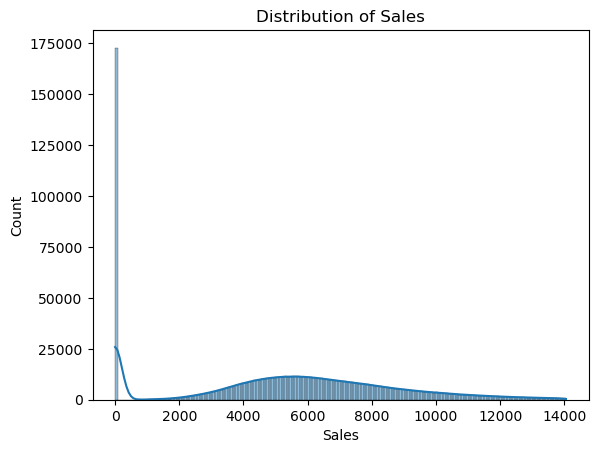

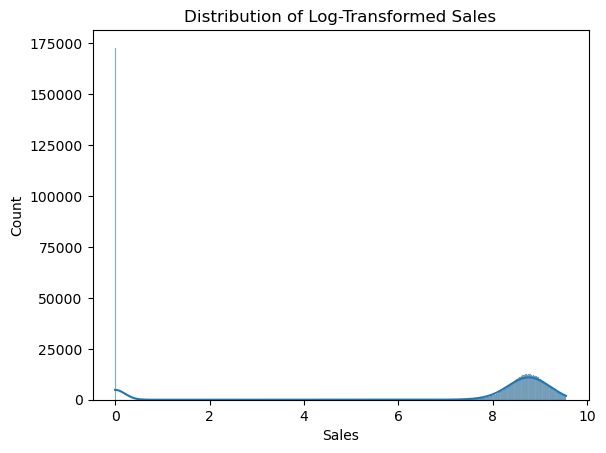

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot the distribution of the target variable
sns.histplot(train_df_merged['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()

# Apply log transformation if necessary
train_df_merged['Sales'] = np.log1p(train_df_merged['Sales'])

# Check the distribution after log transformation
sns.histplot(train_df_merged['Sales'], kde=True)
plt.title('Distribution of Log-Transformed Sales')
plt.show()


-------------------------------------------------------------------------------------------------------------------

### **3.Exploratory Data Analysis(EDA)**

**3.1 Univariate Analysis**
- We will examine the distribution of key variables, such as Sales, Customers, StoreType, and CompetitionDistance.

First i'll start by analyzing the distribution of key variables using histograms, box plots, and density plots.

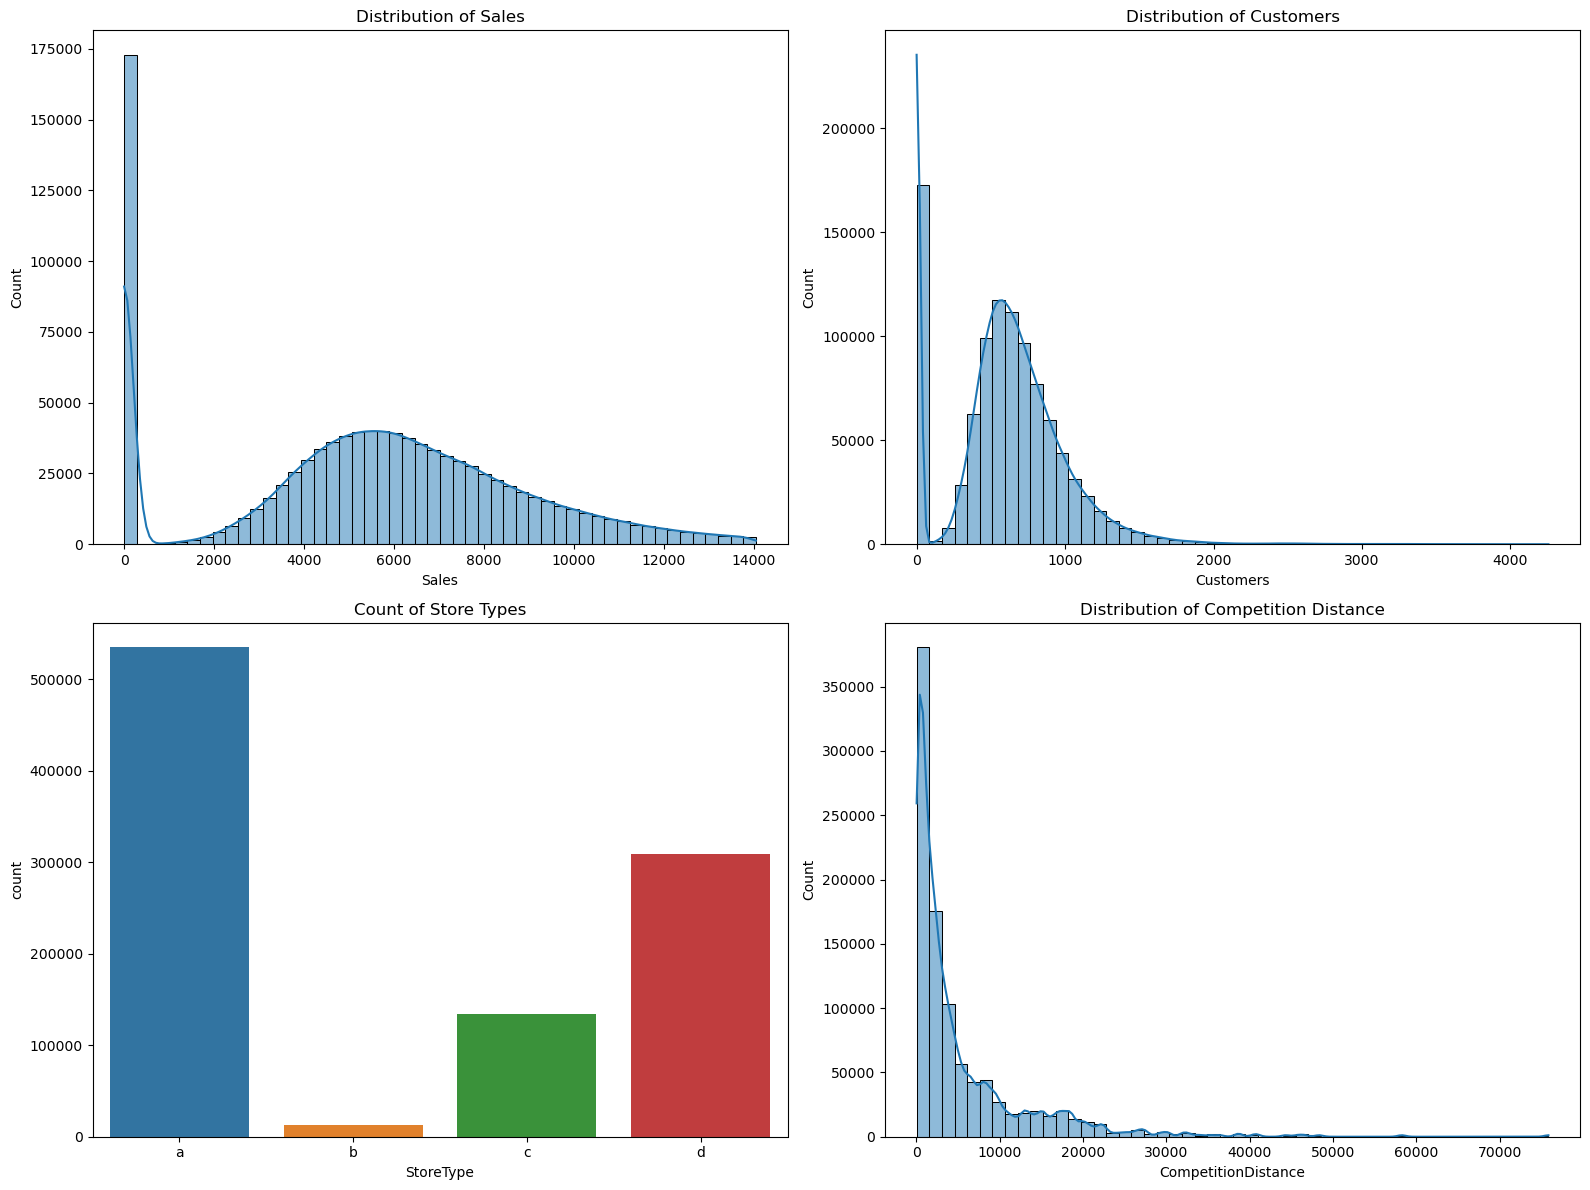

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axis for subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Sales distribution
sns.histplot(train_df_merged['Sales'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Sales')

# Customers distribution
sns.histplot(train_df_merged['Customers'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Customers')

# StoreType distribution
sns.countplot(x='StoreType', data=train_df_merged, ax=axes[1, 0])
axes[1, 0].set_title('Count of Store Types')

# CompetitionDistance distribution
sns.histplot(train_df_merged['CompetitionDistance'], bins=50, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Competition Distance')

plt.tight_layout()
plt.show()


**Analysis**

**Sales Distribution**
- Histogram with KDE: The sales distribution is typically right-skewed. This means that most stores have lower sales, with a smaller number of -stores having very high sales.
- insight: The skewness suggests that while some stores are very successful, many stores may struggle with lower sales. This could indicate variability in store performance due to factors like location, competition, or store type.

**Customers Distribution**
- Histogram with KDE: Similar to the sales distribution, the number of customers is also right-skewed. This indicates that most stores see a moderate number of customers, while a few stores attract a much larger crowd.
- Insights: Higher customer traffic often correlates with higher sales, but the variation suggests that not all customer visits convert into sales equally across stores.

**StoreType Distribution**
- Count Plot: The distribution of store types shows which types are most common. For example, if type 'a' is the most frequent, it may represent the typical Rossmann store, whereas other types may cater to different markets or offer different services.
-Insights: Understanding which store types dominate can help focus efforts on analyzing those that contribute most to overall sales.

**CompetitionDistance Distribution**
- Histogram with KDE: The distribution of CompetitionDistance may show a concentration around certain values, with some stores having very close competition and others being more isolated.
- Insights: Stores with nearby competition might have to work harder (e.g., through promotions) to maintain sales. Isolated stores might have a competitive advantage in 

-------------------------------------------------------------------------------------------------------------------


**3.2 Bivariate and Multivariate Analysis**
- We will explore relationships between variables, such as the impact of promotions on sales, the effect of competition distance, and seasonal variations.



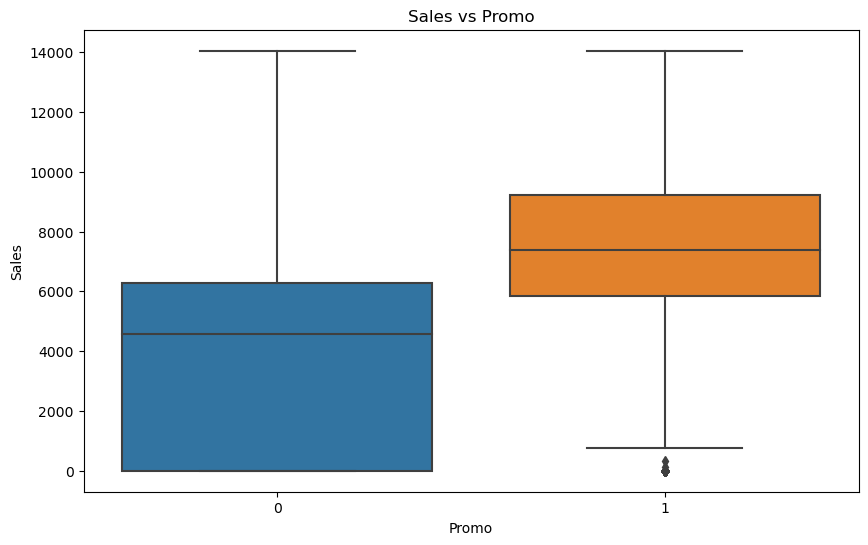

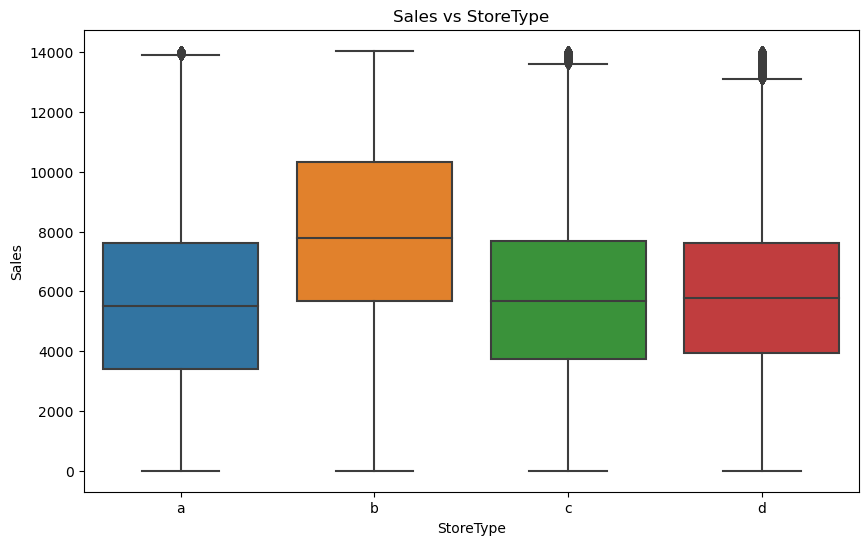

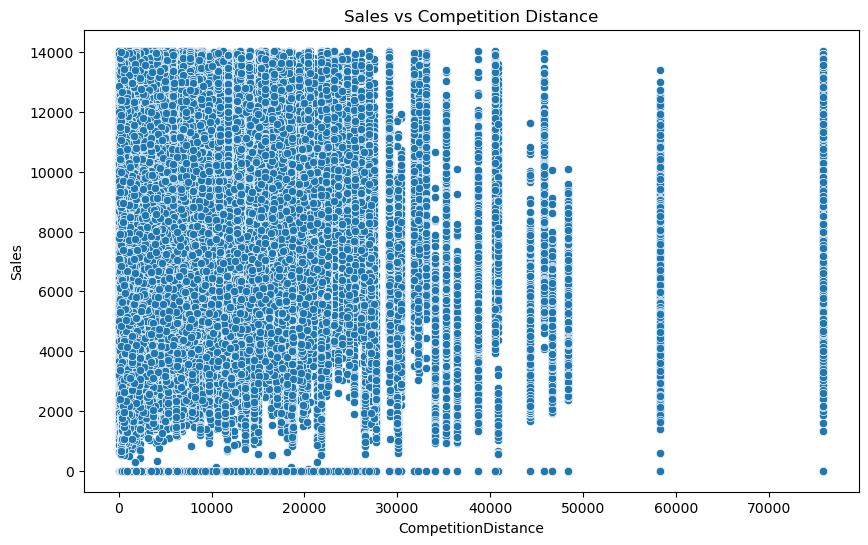

In [14]:
# Sales vs Promo
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo', y='Sales', data=train_df_merged)
plt.title('Sales vs Promo')
plt.show()

# Sales vs StoreType
plt.figure(figsize=(10, 6))
sns.boxplot(x='StoreType', y='Sales', data=train_df_merged)
plt.title('Sales vs StoreType')
plt.show()

# Sales vs CompetitionDistance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=train_df_merged)
plt.title('Sales vs Competition Distance')
plt.show()


**Analysis**

**Sales vs Promo**
- Box Plot: This plot typically shows that stores running promotions (Promo = 1) have higher median sales than those without promotions (Promo = 0). The spread (variance) in sales might also be larger for promoted sales.
- Insights: Promotions are an effective way to boost sales, though the impact can vary significantly across stores. Some stores may benefit more from promotions than others.

**Sales vs StoreType**
- Box Plot: Different store types show varying levels of sales. For instance, some store types may consistently outperform others, while certain types may have wider variability in sales.
- Insights: Store type plays a significant role in sales performance. This might be due to differences in store size, location, customer demographics, or product offerings.

**Sales vs Competition Distance**
- Scatter Plot: The relationship between CompetitionDistance and Sales may reveal that closer competition (shorter distance) generally correlates with lower sales, while stores with less nearby competition tend to have higher sales.
- Insights: Competition impacts sales, but the effect is complex. Some stores manage to thrive even with close competition, possibly due to stronger brand loyalty or superior service.

**3.3 Time-Series Analysis**
- We will analyze sales trends over time, looking at seasonal patterns, holidays, and promotions.
- SAles Over Time 
- Sales By Day Of The Week
- Sales by Month 

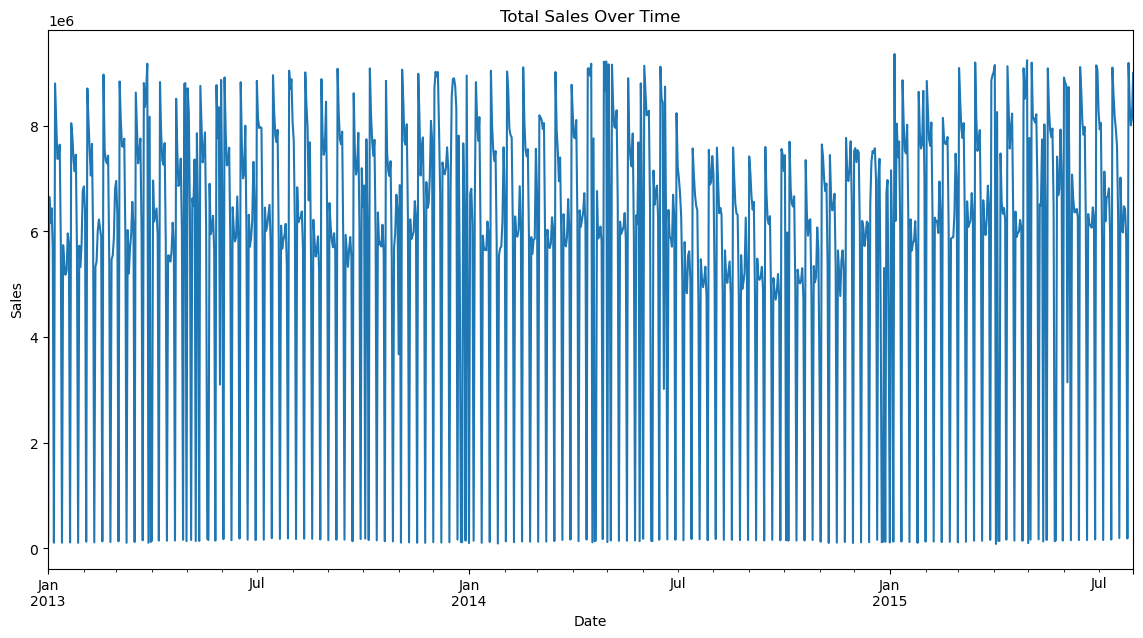

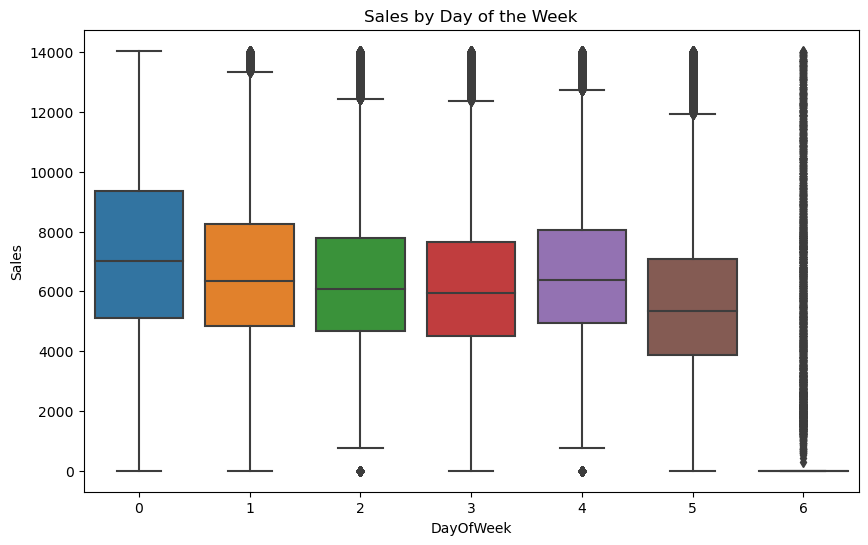

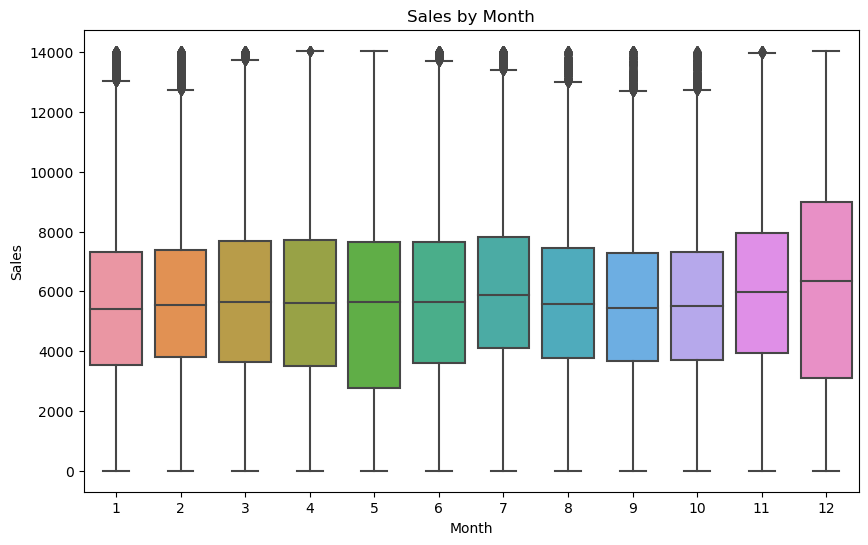

In [15]:
# Sales over time
plt.figure(figsize=(14, 7))
train_df_merged.groupby('Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.ylabel('Sales')
plt.show()

# Sales by DayOfWeek
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y='Sales', data=train_df_merged)
plt.title('Sales by Day of the Week')
plt.show()

# Sales by Month
train_df_merged['Month'] = train_df_merged['Date'].dt.month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Sales', data=train_df_merged)
plt.title('Sales by Month')
plt.show()


**Analysis**

**Total Sales Over Time**
- Line Plot: The overall trend in sales over time may show seasonal patterns, such as peaks during certain times of the year (e.g., holidays or back-to-school periods) and troughs during slower periods.
- Insights: Sales are cyclical, with identifiable high and low periods. Understanding these trends is crucial for planning promotions and inventory management.

**Sales by Day of the Week**
- Box Plot: Sales typically vary by the day of the week, with some days (e.g., weekends) showing higher median sales than others (e.g., weekdays).
- Insights: Certain days are consistently more profitable, which could inform staffing and promotional strategies. For example, running promotions on slower days might help balance the sales across the week.

**Sales by Month**
- Box Plot: Monthly sales trends often reveal seasonality, with some months consistently outperforming others. For example, November and December might show spikes due to holiday shopping.
- Insights: Seasonal variations are crucial for forecasting and planning. Identifying peak months allows for better resource allocation, such as increasing stock levels or running targeted marketing campaigns.

**EDA Summary Of Key Findings**
- **Sales and Customer Distribution:** Both are right-skewed, indicating variability in store performance.
- **Promotions:** Effective in boosting sales, though impact varies across stores.
- **Store Types:** Different types perform differently, suggesting the need for tailored strategies based on store type.
- **Competition:** Closer competition generally leads to lower sales, but the relationship is not absolute.
- **Time-Series Trends:** Sales show clear seasonal patterns, with specific days and months being more profitable.

**3.4 Correlation Analysis**

- **Correlation Analysis:** A heatmap can reveal how strongly different features are correlated with each other and with the target variable (Sales). Strong correlations can indicate multicollinearity, which might need to be addressed.
- **Feature Selection:** Identifying features that have a strong correlation with the target variable (Sales) can guide you in selecting the most relevant features for your predictive models.

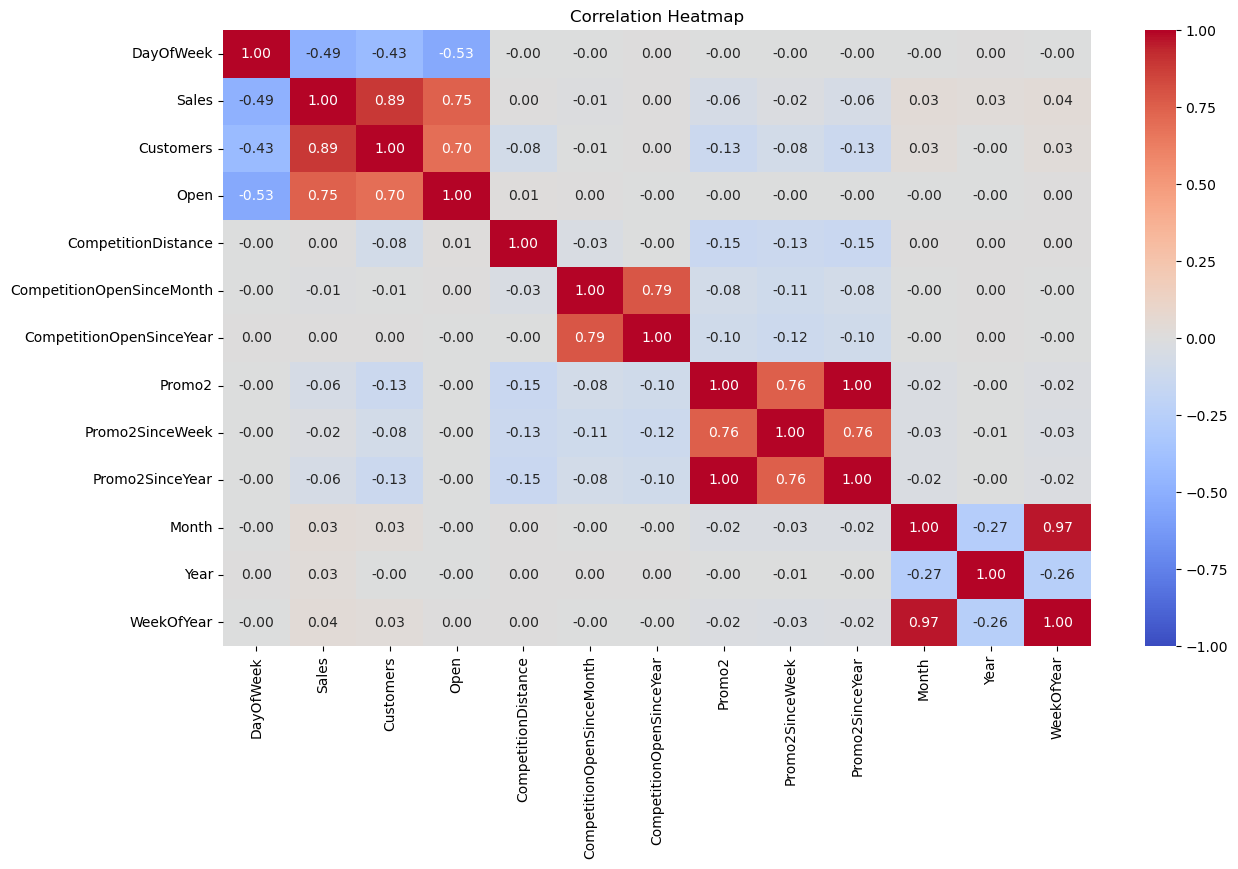

Sales                        1.000000
Customers                    0.886841
Open                         0.745994
WeekOfYear                   0.038690
Month                        0.034278
Year                         0.027588
CompetitionDistance          0.003234
CompetitionOpenSinceYear     0.000636
CompetitionOpenSinceMonth   -0.008401
Promo2SinceWeek             -0.023359
Promo2                      -0.061149
Promo2SinceYear             -0.061163
DayOfWeek                   -0.490000
Name: Sales, dtype: float64


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns
numeric_columns = train_df_merged.select_dtypes(include=['number'])

# Calculate the correlation matrix for the numerical features
corr_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Display the correlation matrix to identify strong correlations
corr_sales = corr_matrix['Sales'].sort_values(ascending=False)
print(corr_sales)



**Analysis Of The HeatMap**

**Strong Positive Correlations**

- Sales and Customers (0.88): There is a very strong positive correlation between Sales and Customers. This means that the number of customers is a crucial predictor of sales.
- Action: Ensure that Customers is included as a key feature in your models.


**Moderate Positive Correlation**

- Sales and Open (0.75): The Open variable is also positively correlated with Sales. This makes sense since stores that are open will have sales, whereas closed stores will not.
- Action: Include Open in the model, but be cautious as it might be binary and less informative on days when all stores are open or closed.

**Low or No Correlatio**

- CompetitionDistance, Promo2, Promo2SinceWeek, and Promo2SinceYear: These features show low or almost no correlation with Sales.
- Action: These features may not be strong predictors individually but could still play a role in interactions or more complex models like tree-based models or neural networks.

**Multicollinearity**

- Promo2, Promo2SinceWeek, Promo2SinceYear: These features are highly correlated with each other, indicating multicollinearity.
- Action: You might consider using only one of these features or using dimensionality reduction techniques like PCA to address multicollinearity. Alternatively, tree-based models like Random Forest or XGBoost can handle multicollinearity better than linear models.

------------------------------------------------------------------------------------------------------

### **4. Feature Engineering**
This step involves creating new features that may help improve model performance, encoding categorical variables, and selecting the most relevant features for model building.




**Create New Features**

 - Extract Date-Related Features
 - Create Binary Features
 - Engineer Features for Competition and Promotions
 - Create an "IsPromo" Feature indicating if promotion is running 
 - Enginer Features For Competition and Promotion (in months and in weeks)
 - Add Lag Features
 - Add Sine and Cosine Transformation 
 - one hot encoding for Store and PCA for store.
 - Split the Dataset Based on Time

**Extract Date-Related Features**

In [14]:
# Extract date-related features
train_df_merged['DayOfWeek'] = train_df_merged['Date'].dt.dayofweek
train_df_merged['Month'] = train_df_merged['Date'].dt.month
train_df_merged['Year'] = train_df_merged['Date'].dt.year
train_df_merged['WeekOfYear'] = train_df_merged['Date'].dt.isocalendar().week

test_df_merged['DayOfWeek'] = test_df_merged['Date'].dt.dayofweek
test_df_merged['Month'] = test_df_merged['Date'].dt.month
test_df_merged['Year'] = test_df_merged['Date'].dt.year
test_df_merged['WeekOfYear'] = test_df_merged['Date'].dt.isocalendar().week

**Create Binary Features**


In [15]:
# Create binary features for holidays and promotions
train_df_merged['IsHoliday'] = train_df_merged['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)
test_df_merged['IsHoliday'] = test_df_merged['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)

# Create an "IsPromo" feature indicating if a promotion is running
train_df_merged['IsPromo'] = train_df_merged['Promo'].apply(lambda x: 1 if x == 1 else 0)
test_df_merged['IsPromo'] = test_df_merged['Promo'].apply(lambda x: 1 if x == 1 else 0)

# Display the first few rows to verify the creation of binary features
print(train_df_merged[['StateHoliday', 'IsHoliday', 'Promo', 'IsPromo']].head())
print(test_df_merged[['StateHoliday', 'IsHoliday', 'Promo', 'IsPromo']].head())


  StateHoliday  IsHoliday Promo IsPromo
0            0          0     1       1
1            0          0     1       1
2            0          0     1       1
3            0          0     1       1
4            0          0     1       1
  StateHoliday IsHoliday Promo IsPromo
0            0         0     1       1
1            0         0     1       1
2            0         0     1       1
3            0         0     1       1
4            0         0     1       1


**Engineer features for competition and promotions**

In [16]:

# Calculate competition duration in months
train_df_merged['CompetitionOpenSince'] = 12 * (train_df_merged['Year'] - train_df_merged['CompetitionOpenSinceYear']) + (train_df_merged['Month'] - train_df_merged['CompetitionOpenSinceMonth'])
test_df_merged['CompetitionOpenSince'] = 12 * (test_df_merged['Year'] - test_df_merged['CompetitionOpenSinceYear']) + (test_df_merged['Month'] - test_df_merged['CompetitionOpenSinceMonth'])

# Handle cases where the competition hasn't started yet (negative values)
train_df_merged['CompetitionOpenSince'] = train_df_merged['CompetitionOpenSince'].apply(lambda x: max(x, 0))
test_df_merged['CompetitionOpenSince'] = test_df_merged['CompetitionOpenSince'].apply(lambda x: max(x, 0))

# Verify the feature
print(train_df_merged[['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpenSince']].head())
print(test_df_merged[['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpenSince']].head())




   CompetitionOpenSinceYear  CompetitionOpenSinceMonth  CompetitionOpenSince
0                    2008.0                        9.0                  82.0
1                    2007.0                       11.0                  92.0
2                    2006.0                       12.0                 103.0
3                    2009.0                        9.0                  70.0
4                    2015.0                        4.0                   3.0
   CompetitionOpenSinceYear  CompetitionOpenSinceMonth  CompetitionOpenSince
0                    2008.0                        9.0                  84.0
1                    2006.0                       12.0                 105.0
2                    2013.0                        4.0                  29.0
3                    2014.0                       10.0                  11.0
4                    2000.0                        8.0                 181.0


In [17]:
# Calculate Promo2 duration in weeks
train_df_merged['Promo2OpenSince'] = 52 * (train_df_merged['Year'] - train_df_merged['Promo2SinceYear']) + (train_df_merged['WeekOfYear'] - train_df_merged['Promo2SinceWeek'])
test_df_merged['Promo2OpenSince'] = 52 * (test_df_merged['Year'] - test_df_merged['Promo2SinceYear']) + (test_df_merged['WeekOfYear'] - test_df_merged['Promo2SinceWeek'])

# Handle cases where the promo hasn't started yet (negative values)
train_df_merged['Promo2OpenSince'] = train_df_merged['Promo2OpenSince'].apply(lambda x: max(x, 0))
test_df_merged['Promo2OpenSince'] = test_df_merged['Promo2OpenSince'].apply(lambda x: max(x, 0))

# Verify the feature
print(train_df_merged[['Promo2SinceYear', 'Promo2SinceWeek', 'Promo2OpenSince']].head())
print(test_df_merged[['Promo2SinceYear', 'Promo2SinceWeek', 'Promo2OpenSince']].head())


   Promo2SinceYear  Promo2SinceWeek  Promo2OpenSince
0              0.0              0.0         104811.0
1           2010.0             13.0            278.0
2           2011.0             14.0            225.0
3              0.0              0.0         104811.0
4              0.0              0.0         104811.0
   Promo2SinceYear  Promo2SinceWeek  Promo2OpenSince
0              0.0              0.0         104818.0
1           2011.0             14.0            232.0
2              0.0              0.0         104818.0
3              0.0              0.0         104818.0
4              0.0              0.0         104818.0


 **Encode Categorical Variables**
 
 We'll encode categorical variables using either one-hot encoding or label encoding, depending on the nature of the variable.

In [18]:
from sklearn.preprocessing import LabelEncoder

# Convert all values in 'StateHoliday' to strings and apply Label Encoding
train_df_merged['StateHoliday'] = train_df_merged['StateHoliday'].astype(str)
test_df_merged['StateHoliday'] = test_df_merged['StateHoliday'].astype(str)

label_encoder = LabelEncoder()
train_df_merged['StateHoliday'] = label_encoder.fit_transform(train_df_merged['StateHoliday'])
test_df_merged['StateHoliday'] = label_encoder.transform(test_df_merged['StateHoliday'])

# One-Hot Encoding for categorical variables: 'StoreType', 'Assortment', and 'PromoInterval'
train_df_merged = pd.get_dummies(train_df_merged, columns=['StoreType', 'Assortment', 'PromoInterval'], drop_first=True)
test_df_merged = pd.get_dummies(test_df_merged, columns=['StoreType', 'Assortment', 'PromoInterval'], drop_first=True)

# Align columns between train and test sets (important if using different datasets)
test_df_merged = test_df_merged.reindex(columns=train_df_merged.columns, fill_value=0)

# Verify the encoding
print(train_df_merged.head())
print(test_df_merged.head())


/Users/mustafaaldabbas/anaconda3/envs/myenv/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:555: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)


  Store  DayOfWeek       Date     Sales  Customers  Open Promo  StateHoliday  \
0     1          4 2015-07-31  8.568646        555     1     1             0   
1     2          4 2015-07-31  8.710290        625     1     1             0   
2     3          4 2015-07-31  9.025816        821     1     1             0   
3     4          4 2015-07-31  9.546527       1498     1     1             0   
4     5          4 2015-07-31  8.481151        559     1     1             0   

  SchoolHoliday  CompetitionDistance  ...  CompetitionOpenSince  \
0             1               1270.0  ...                  82.0   
1             1                570.0  ...                  92.0   
2             1              14130.0  ...                 103.0   
3             1                620.0  ...                  70.0   
4             1              29910.0  ...                   3.0   

   Promo2OpenSince  StoreType_b  StoreType_c  StoreType_d  Assortment_b  \
0         104811.0            0          

 **Add Lag Features For Sales**

In [19]:
# Lag Features for Sales
train_df_merged['Sales_Lag_1'] = train_df_merged['Sales'].shift(1)
train_df_merged['Sales_Lag_7'] = train_df_merged['Sales'].shift(7)
train_df_merged['Sales_Lag_30'] = train_df_merged['Sales'].shift(30)

# Drop rows with NaN values resulting from lag features
train_df_merged = train_df_merged.dropna()

# Verify the lag features
print(train_df_merged[['Sales', 'Sales_Lag_1', 'Sales_Lag_7', 'Sales_Lag_30']].head())


       Sales  Sales_Lag_1  Sales_Lag_7  Sales_Lag_30
30  9.318746     9.286375     9.489032      8.568646
31  9.426500     9.318746     8.895904      8.710290
32  9.427305     9.426500     9.149741      9.025816
33  9.115150     9.427305     8.471568      9.546527
34  8.913954     9.115150     8.888619      8.481151


 **Add Lag Features For Customer**

In [20]:
# Create lag features for 'Customers'
train_df_merged['Customers_Lag_1'] = train_df_merged['Customers'].shift(1)
train_df_merged['Customers_Lag_7'] = train_df_merged['Customers'].shift(7)
train_df_merged['Customers_Lag_30'] = train_df_merged['Customers'].shift(30)

# Apply the same for the test set
test_df_merged['Customers_Lag_1'] = test_df_merged['Customers'].shift(1)
test_df_merged['Customers_Lag_7'] = test_df_merged['Customers'].shift(7)
test_df_merged['Customers_Lag_30'] = test_df_merged['Customers'].shift(30)

# Fill NaN values with 0 or use forward fill/backward fill based on your data context
train_df_merged.fillna(0, inplace=True)
test_df_merged.fillna(0, inplace=True)


**Create Lag Features for 'Open'**

In [21]:
# Create lag features for 'Open'
train_df_merged['Open_Lag_1'] = train_df_merged['Open'].shift(1)
train_df_merged['Open_Lag_7'] = train_df_merged['Open'].shift(7)
train_df_merged['Open_Lag_30'] = train_df_merged['Open'].shift(30)

# Drop rows with NaN values created by the lag features
train_df_merged.dropna(inplace=True)

**Create moving Average features for 'Sales'and Customer.**

In [34]:
# Create moving average features for 'Sales'
train_df_merged['Sales_MA_7'] = train_df_merged['Sales'].rolling(window=7).mean()
train_df_merged['Sales_MA_30'] = train_df_merged['Sales'].rolling(window=30).mean()

# Optionally, create moving averages for 'Customers' if it was available
train_df_merged['Customers_MA_7'] = train_df_merged['Customers'].rolling(window=7).mean()
train_df_merged['Customers_MA_30'] = train_df_merged['Customers'].rolling(window=30).mean()

# Drop NaN values caused by the rolling operation
train_df_merged.dropna(inplace=True)


# Assuming you have train_df_merged with 'Sales' data available
# Create lag features
test_df_merged['Sales_Lag_1'] = train_df_merged['Sales'].shift(1)
test_df_merged['Sales_Lag_7'] = train_df_merged['Sales'].shift(7)
test_df_merged['Sales_Lag_30'] = train_df_merged['Sales'].shift(30)

# Create moving average features
test_df_merged['Sales_MA_7'] = train_df_merged['Sales'].rolling(window=7).mean()
test_df_merged['Sales_MA_30'] = train_df_merged['Sales'].rolling(window=30).mean()

# Create lag features for 'Open'
test_df_merged['Open_Lag_1'] = test_df_merged['Open'].shift(1)
test_df_merged['Open_Lag_7'] = test_df_merged['Open'].shift(7)
test_df_merged['Open_Lag_30'] = test_df_merged['Open'].shift(30)

# Repeat for customer moving averages if applicable
test_df_merged['Customers_MA_7'] = train_df_merged['Customers'].rolling(window=7).mean()
test_df_merged['Customers_MA_30'] = train_df_merged['Customers'].rolling(window=30).mean()

 **Add Sine and Cosine Transformation**

In [23]:
import numpy as np

# Apply Sine and Cosine Transformations to cyclical features
train_df_merged['DayOfWeek_Sin'] = np.sin(2 * np.pi * train_df_merged['DayOfWeek'] / 7)
train_df_merged['DayOfWeek_Cos'] = np.cos(2 * np.pi * train_df_merged['DayOfWeek'] / 7)

train_df_merged['Month_Sin'] = np.sin(2 * np.pi * train_df_merged['Month'] / 12)
train_df_merged['Month_Cos'] = np.cos(2 * np.pi * train_df_merged['Month'] / 12)

train_df_merged['WeekOfYear_Sin'] = np.sin(2 * np.pi * train_df_merged['WeekOfYear'] / 52)
train_df_merged['WeekOfYear_Cos'] = np.cos(2 * np.pi * train_df_merged['WeekOfYear'] / 52)

# Apply the same transformations to the test set
test_df_merged['DayOfWeek_Sin'] = np.sin(2 * np.pi * test_df_merged['DayOfWeek'] / 7)
test_df_merged['DayOfWeek_Cos'] = np.cos(2 * np.pi * test_df_merged['DayOfWeek'] / 7)

test_df_merged['Month_Sin'] = np.sin(2 * np.pi * test_df_merged['Month'] / 12)
test_df_merged['Month_Cos'] = np.cos(2 * np.pi * test_df_merged['Month'] / 12)

test_df_merged['WeekOfYear_Sin'] = np.sin(2 * np.pi * test_df_merged['WeekOfYear'] / 52)
test_df_merged['WeekOfYear_Cos'] = np.cos(2 * np.pi * test_df_merged['WeekOfYear'] / 52)

# Verify the transformations
train_df_merged[['DayOfWeek_Sin', 'DayOfWeek_Cos', 'Month_Sin', 'Month_Cos', 'WeekOfYear_Sin', 'WeekOfYear_Cos']].head()



,DayOfWeek_Sin,DayOfWeek_Cos,Month_Sin,Month_Cos,WeekOfYear_Sin,WeekOfYear_Cos
89,-0.433884,-0.900969,-0.5,-0.866025,-0.568065,-0.822984
90,-0.433884,-0.900969,-0.5,-0.866025,-0.568065,-0.822984
91,-0.433884,-0.900969,-0.5,-0.866025,-0.568065,-0.822984
92,-0.433884,-0.900969,-0.5,-0.866025,-0.568065,-0.822984
93,-0.433884,-0.900969,-0.5,-0.866025,-0.568065,-0.822984


**Drop Any NA Values resulting from Lagging and Sin and Cosine**

In [35]:
test_df_merged

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,...,Sales_Lag_1,Sales_Lag_7,Sales_Lag_30,Sales_MA_7,Sales_MA_30,Open_Lag_1,Open_Lag_7,Open_Lag_30,Customers_MA_7,Customers_MA_30
0,1,3,2015-09-17,0,0,1.0,1,0,0,1270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,3,2015-09-17,0,0,1.0,1,0,0,14130.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,7,3,2015-09-17,0,0,1.0,1,0,0,24000.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,8,3,2015-09-17,0,0,1.0,1,0,0,7520.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,9,3,2015-09-17,0,0,1.0,1,0,0,2030.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,5,2015-08-01,0,0,1.0,0,0,0,1900.0,...,8.422663,8.700681,8.732627,8.554569,8.568548,1.0,1.0,1.0,696.428571,681.000000
41084,1112,5,2015-08-01,0,0,1.0,0,0,0,1880.0,...,8.386173,8.773539,8.452975,8.501043,8.566744,1.0,1.0,1.0,627.571429,681.600000
41085,1113,5,2015-08-01,0,0,1.0,0,0,0,9260.0,...,8.398860,8.515191,8.612685,8.490962,8.561142,1.0,1.0,1.0,602.142857,676.566667
41086,1114,5,2015-08-01,0,0,1.0,0,0,0,870.0,...,8.444622,8.767796,8.502891,8.467551,8.564510,1.0,1.0,1.0,601.714286,676.366667


In [33]:
train_df_merged

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,...,Sales_MA_7,Sales_MA_30,Customers_MA_7,Customers_MA_30,DayOfWeek_Sin,DayOfWeek_Cos,Month_Sin,Month_Cos,WeekOfYear_Sin,WeekOfYear_Cos
89,94,4,2015-07-31,9.032768,694,1,1,0,1,14620.0,...,8.968095,9.005600,778.714286,797.066667,-0.433884,-0.900969,-0.5,-0.866025,-0.568065,-0.822984
90,95,4,2015-07-31,9.041448,920,1,1,0,1,1890.0,...,8.978294,8.990585,799.285714,796.566667,-0.433884,-0.900969,-0.5,-0.866025,-0.568065,-0.822984
91,96,4,2015-07-31,8.759512,612,1,1,0,1,8780.0,...,8.958927,8.986707,784.428571,798.266667,-0.433884,-0.900969,-0.5,-0.866025,-0.568065,-0.822984
92,97,4,2015-07-31,9.033723,802,1,1,0,1,8980.0,...,8.913780,8.987003,714.000000,803.800000,-0.433884,-0.900969,-0.5,-0.866025,-0.568065,-0.822984
93,98,4,2015-07-31,8.855521,512,1,1,0,1,15140.0,...,8.932191,8.971890,708.000000,790.466667,-0.433884,-0.900969,-0.5,-0.866025,-0.568065,-0.822984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990510,1111,1,2013-01-01,0.000000,0,0,0,1,1,1900.0,...,0.000000,0.289772,0.000000,46.833333,0.781831,0.623490,0.5,0.866025,0.120537,0.992709
990511,1112,1,2013-01-01,0.000000,0,0,0,1,1,1880.0,...,0.000000,0.289772,0.000000,46.833333,0.781831,0.623490,0.5,0.866025,0.120537,0.992709
990512,1113,1,2013-01-01,0.000000,0,0,0,1,1,9260.0,...,0.000000,0.289772,0.000000,46.833333,0.781831,0.623490,0.5,0.866025,0.120537,0.992709
990513,1114,1,2013-01-01,0.000000,0,0,0,1,1,870.0,...,0.000000,0.289772,0.000000,46.833333,0.781831,0.623490,0.5,0.866025,0.120537,0.992709


**Split The Data into Training and Based on time**

In [29]:
# Define the cutoff date for splitting
cutoff_date = '2015-06-01'

# Split the dataset into training and test sets based on the cutoff date
train_set = train_df_merged[train_df_merged['Date'] < cutoff_date]
test_set = train_df_merged[train_df_merged['Date'] >= cutoff_date]




**Seperate the Features and the Target for test and train set**

In [31]:
# Separate features and target variable for training and testing
X_train = train_set.drop(columns=['Sales', 'Date','Customers','Open'])
y_train = train_set['Sales']

X_test = test_set.drop(columns=['Sales', 'Date','Open','Customers'])
y_test = test_set['Sales']

# Verify the split
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

print("Training set date range:", train_set['Date'].min(), "to", train_set['Date'].max())
print("Test set date range:", test_set['Date'].min(), "to", test_set['Date'].max())

Training set shape: (924461, 45)
Test set shape: (65965, 45)
Training set date range: 2013-01-01 00:00:00 to 2015-05-31 00:00:00
Test set date range: 2015-06-01 00:00:00 to 2015-07-31 00:00:00


### **5.Model Building**

- baseline model using the top features identified.
- Experiment with different models like Linear Regression, Random Forest, XGBoost, or more advanced techniques based on your project's requirements.
- Evaluate model performance using cross-validation and metrics like RMSE, MAE, or R².


#### **Random Forest Model**

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model on the full training dataset
rf_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = rf_model.predict(X_test)

# Evaluate model performance on the test set
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test RMSE: {test_rmse}")
print(f"Test MAE: {test_mae}")
print(f"Test R-squared: {test_r2}")




Test RMSE: 0.4510684409320726
Test MAE: 0.22171655604389803
Test R-squared: 0.9785973804528285


**Analysing the Results**



**Test RMSE (Root Mean Squared Error): 0.4511**

- This indicates that, on average, the model's predictions are off by about 0.45 units.
- This is a relatively low error, suggesting that the model is performing well.

**Test MAE (Mean Absolute Error): 0.2217**

- The MAE shows that the average magnitude of the errors is about 0.22 units.
-  This further supports that the model's predictions are generally close to the actual sales values.

**Test R-squared (R²): 0.9786**

- An R² of 0.9786 indicates that approximately 97.86% of the variance in sales is explained by the model. 
- This is a very strong fit, suggesting that the model is capturing most of the relevant patterns in the data.

 **Interpretation:**
- Overall Performance: The model appears to perform very well, with a high R-squared value and relatively low error metrics (RMSE and MAE).
- Model Reliability: The high R-squared value suggests that the model is reliable for predicting sales based on the features you've included.

**Prediction Accuracy:**
 - The relatively low RMSE and MAE indicate that the model's predictions are close to the actual sales values, which is a good sign for its potential use in real-world forecasting.

**Feature Importance For RandomeForestRegressor**

Random Forest Feature Importance (Top 20):
                      Feature  Importance
41                 Sales_MA_7    0.955291
18                StoreType_b    0.014838
3                StateHoliday    0.013323
1                   DayOfWeek    0.004984
5         CompetitionDistance    0.003687
0                       Store    0.001918
43             Customers_MA_7    0.001479
6   CompetitionOpenSinceMonth    0.000715
7    CompetitionOpenSinceYear    0.000502
42                Sales_MA_30    0.000470
14                  IsHoliday    0.000461
16       CompetitionOpenSince    0.000305
26                Sales_Lag_1    0.000240
17            Promo2OpenSince    0.000229
35            Customers_Lag_1    0.000215
10            Promo2SinceYear    0.000183
22               Assortment_c    0.000165
44            Customers_MA_30    0.000155
34             WeekOfYear_Cos    0.000134
9             Promo2SinceWeek    0.000108


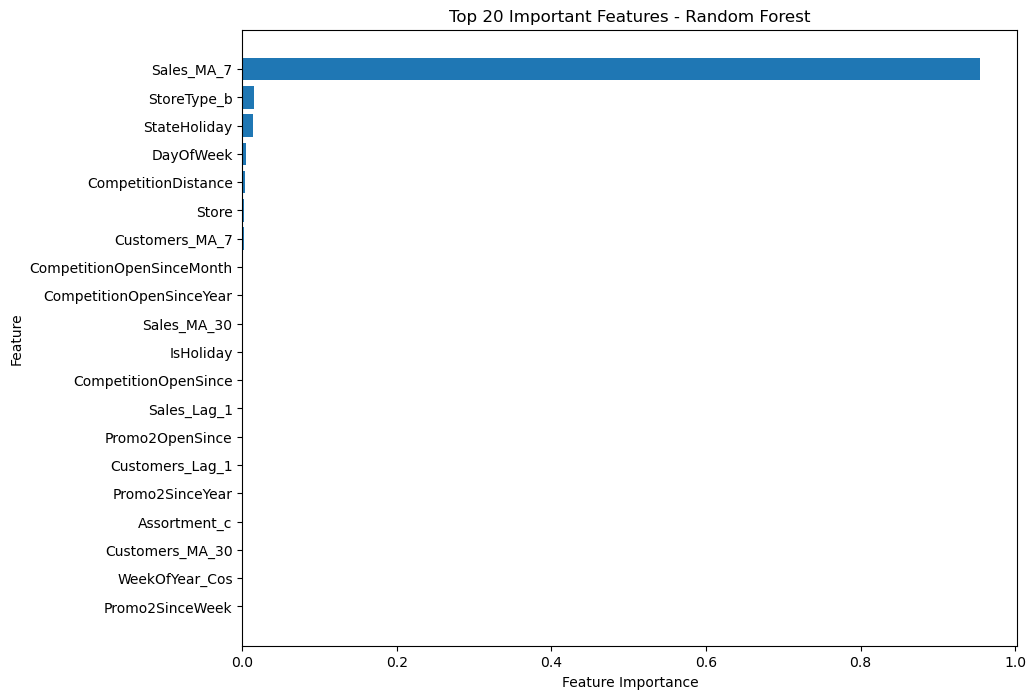

In [99]:
# Get feature importances from the Random Forest model
importances_rf = rf_model.feature_importances_
features_rf = X_train.columns

# Create a DataFrame for visualization
feature_importance_rf_df = pd.DataFrame({'Feature': features_rf, 'Importance': importances_rf}).sort_values(by='Importance', ascending=False)

# Display the top 20 most important features for Random Forest
print("Random Forest Feature Importance (Top 20):")
print(feature_importance_rf_df.head(20))

# Optionally, plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(feature_importance_rf_df['Feature'].head(20), feature_importance_rf_df['Importance'].head(20))
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 20 Important Features - Random Forest")
plt.gca().invert_yaxis()
plt.show()


#### **XGBoost Model** 



In [98]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the XGBoost Regressor with categorical support
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=10, random_state=42, enable_categorical=True)

try:
    # Train the model on the training data
    xgb_model.fit(X_train, y_train)

    # Predict on the test set
    y_test_pred_xgb = xgb_model.predict(X_test)

    # Evaluate model performance on the test set
    test_rmse_xgb = mean_squared_error(y_test, y_test_pred_xgb, squared=False)
    test_mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
    test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

    print(f"XGBoost Test RMSE: {test_rmse_xgb}")
    print(f"XGBoost Test MAE: {test_mae_xgb}")
    print(f"XGBoost Test R-squared: {test_r2_xgb}")

except Exception as e:
    print(f"An error occurred: {e}")




XGBoost Test RMSE: 0.28932788558662187
XGBoost Test MAE: 0.07509008893425491
XGBoost Test R-squared: 0.9911943254029328


**LighGBM Regressor Model**

Make sure that all data types are numerical 

**Convert Data Types**

In [111]:
# Convert all columns in X_train and X_test to numeric types (int, float, or bool)
# Force convert to standard float64
X_train['WeekOfYear'] = X_train['WeekOfYear'].astype(float)
X_train['WeekOfYear_Sin'] = X_train['WeekOfYear_Sin'].astype(float)
X_train['WeekOfYear_Cos'] = X_train['WeekOfYear_Cos'].astype(float)

X_test['WeekOfYear'] = X_test['WeekOfYear'].astype(float)
X_test['WeekOfYear_Sin'] = X_test['WeekOfYear_Sin'].astype(float)
X_test['WeekOfYear_Cos'] = X_test['WeekOfYear_Cos'].astype(float)
# Clean the feature names by replacing special characters with underscores
X_train.columns = X_train.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True)
X_test.columns = X_test.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True)

# Verify the cleaned feature names
print(X_train.columns)


# Check the data types of the specific columns
print(X_train[['WeekOfYear', 'WeekOfYear_Sin', 'WeekOfYear_Cos']].dtypes)


Index(['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Month', 'Year', 'WeekOfYear', 'IsHoliday',
       'IsPromo', 'CompetitionOpenSince', 'Promo2OpenSince', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c',
       'PromoInterval_JanAprJulOct', 'PromoInterval_MarJunSeptDec',
       'PromoInterval_None', 'Sales_Lag_1', 'Sales_Lag_7', 'Sales_Lag_30',
       'DayOfWeek_Sin', 'DayOfWeek_Cos', 'Month_Sin', 'Month_Cos',
       'WeekOfYear_Sin', 'WeekOfYear_Cos', 'Customers_Lag_1',
       'Customers_Lag_7', 'Customers_Lag_30', 'Open_Lag_1', 'Open_Lag_7',
       'Open_Lag_30', 'Sales_MA_7', 'Sales_MA_30', 'Customers_MA_7',
       'Customers_MA_30'],
      dtype='object')
WeekOfYear        float64
WeekOfYear_Sin    float64
WeekOfYear_Cos    float64
dtype: object


In [112]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the LightGBM Regressor
lgb_model = lgb.LGBMRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model on the training data
lgb_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred_lgb = lgb_model.predict(X_test)

# Evaluate model performance on the test set
test_rmse_lgb = mean_squared_error(y_test, y_test_pred_lgb, squared=False)
test_mae_lgb = mean_absolute_error(y_test, y_test_pred_lgb)
test_r2_lgb = r2_score(y_test, y_test_pred_lgb)

print(f"LightGBM Test RMSE: {test_rmse_lgb}")
print(f"LightGBM Test MAE: {test_mae_lgb}")
print(f"LightGBM Test R-squared: {test_r2_lgb}")



LightGBM Test RMSE: 0.4371758813942753
LightGBM Test MAE: 0.19602448398778205
LightGBM Test R-squared: 0.9798954463880183


**Analysing**

- **RMSE:** The model's predictions have an average error of approximately 0.437 units in terms of the logarithm of sales (since you applied a log transformation).
- **bMAE:** The average absolute error of the predictions is around 0.196 units.
- **R-squared:** The model explains about 97.99% of the variance in the target variable, indicating a strong fit.

### **6.Hyperparameter Tuning for the Best Model**

- The Best Model is XGboost

In [114]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the model
xgb_model = xgb.XGBRegressor(random_state=42, enable_categorical=True)

# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [6, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='neg_root_mean_squared_error', 
                           cv=3, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best RMSE: ", -grid_search.best_score_)

# Train the best model
best_xgb_model = grid_search.best_estimator_

# Predict on the test set
y_test_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluate the best model on the test set
test_rmse_best_xgb = mean_squared_error(y_test, y_test_pred_best_xgb, squared=False)
test_mae_best_xgb = mean_absolute_error(y_test, y_test_pred_best_xgb)
test_r2_best_xgb = r2_score(y_test, y_test_pred_best_xgb)

print(f"Best XGBoost Test RMSE: {test_rmse_best_xgb}")
print(f"Best XGBoost Test MAE: {test_mae_best_xgb}")
print(f"Best XGBoost Test R-squared: {test_r2_best_xgb}")


Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=  35.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=  35.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=  35.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=  35.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=  35.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=  36.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1.0; total time=  54.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1.0; total time=  54.6s
[CV] END c

**Results of 3 Models plus Tuning**

In [116]:
import pandas as pd

# Define the results for each model
model_results = {
    'Model': ['Random Forest', 'XGBoost', 'XGBoost (Tuned)', 'LightGBM'],
    'RMSE': [0.4511, 0.2893, 0.3163, 0.4372],
    'MAE': [0.2217, 0.0751, 0.0920, 0.1960],
    'R-squared': [0.9786, 0.9912, 0.9895, 0.9799],
    'Hyperparameters': [
        'n_estimators=100, max_depth=10',  # Random Forest parameters
        'n_estimators=100, max_depth=10',  # XGBoost parameters
        str(grid_search.best_params_),     # Tuned XGBoost best parameters
        'n_estimators=100, max_depth=10'   # LightGBM parameters
    ]
}

# Create a DataFrame from the results
results_df = pd.DataFrame(model_results)

# Display the DataFrame
results_df


,Model,RMSE,MAE,R-squared,Hyperparameters
0,Random Forest,0.4511,0.2217,0.9786,"n_estimators=100, max_depth=10"
1,XGBoost,0.2893,0.0751,0.9912,"n_estimators=100, max_depth=10"
2,XGBoost (Tuned),0.3163,0.0920,0.9895,"{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
3,LightGBM,0.4372,0.1960,0.9799,"n_estimators=100, max_depth=10"


**Save My Best Model**

In [39]:
import joblib

# Save the tuned XGBoost model
joblib.dump(best_xgb_model, 'best_xgb_model_tuned.pkl')



['best_xgb_model_tuned.pkl']

**Train The Model on the Full train_df_merged**

In [41]:
import xgboost as xgb
import joblib

# Load the saved tuned model
best_xgb_model_full = joblib.load('/Users/mustafaaldabbas/Documents/GitHub/Rossmann-sales-prediction/best_xgb_model_tuned.pkl')

# Prepare the training data by dropping the specified columns
X_full_train = train_df_merged.drop(columns=['Sales', 'Date', 'Open', 'Customers'])
y_full_train = train_df_merged['Sales']  # Assuming 'Sales' is the target variable

# Train the model on the prepared full training data
best_xgb_model_full.fit(X_full_train, y_full_train)

# Optionally, save the fully trained model
joblib.dump(best_xgb_model_full, 'best_xgb_model_full_trained.pkl')

# Now, the model is trained on the full dataset, excluding the specified columns


['best_xgb_model_full_trained.pkl']

In [48]:
test_df_merged.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Month', 'Year', 'WeekOfYear',
       'IsHoliday', 'IsPromo', 'CompetitionOpenSince', 'Promo2OpenSince',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b',
       'Assortment_c', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'PromoInterval_None',
       'Customers_Lag_1', 'Customers_Lag_7', 'Customers_Lag_30',
       'DayOfWeek_Sin', 'DayOfWeek_Cos', 'Month_Sin', 'Month_Cos',
       'WeekOfYear_Sin', 'WeekOfYear_Cos', 'Sales_Lag_1', 'Sales_Lag_7',
       'Sales_Lag_30', 'Sales_MA_7', 'Sales_MA_30', 'Open_Lag_1', 'Open_Lag_7',
       'Open_Lag_30', 'Customers_MA_7', 'Customers_MA_30'],
      dtype='object')


### **Predictions for test_df_merged**

- **Ensure Consistency Between Training and Prediction**
- **Prepare The Test Dataset**
- **Make Predictions**
- **Save Predidctions**


In [54]:
# Ensure the test set has the same columns in the same order as the training set (excluding the target and other non-feature columns)
common_columns = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
                  'CompetitionDistance', 'CompetitionOpenSinceMonth', 
                  'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 
                  'Promo2SinceYear', 'Month', 'Year', 'WeekOfYear', 
                  'IsHoliday', 'IsPromo', 'CompetitionOpenSince', 
                  'Promo2OpenSince', 'StoreType_b', 'StoreType_c', 
                  'StoreType_d', 'Assortment_b', 'Assortment_c', 
                  'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec', 
                  'PromoInterval_None', 'Sales_Lag_1', 'Sales_Lag_7', 
                  'Sales_Lag_30', 'Customers_Lag_1', 'Customers_Lag_7', 
                  'Customers_Lag_30', 'Open_Lag_1', 'Open_Lag_7', 
                  'Open_Lag_30', 'Sales_MA_7', 'Sales_MA_30', 
                  'Customers_MA_7', 'Customers_MA_30', 'DayOfWeek_Sin', 
                  'DayOfWeek_Cos', 'Month_Sin', 'Month_Cos', 
                  'WeekOfYear_Sin', 'WeekOfYear_Cos']

# Reorder the test_df_merged columns to match the training data order
X_test_full = test_df_merged[common_columns]

# Load the trained model
best_xgb_model_full = joblib.load('/Users/mustafaaldabbas/Documents/GitHub/Rossmann-sales-prediction/best_xgb_model_full_trained.pkl')

# Predict sales for the entire timeframe of the test set
predicted_sales = best_xgb_model_full.predict(X_test_full)

# Optionally, add the predictions to the test_df_merged DataFrame
test_df_merged['Predicted_Sales'] = predicted_sales

# Save the predictions to a CSV file
test_df_merged.to_csv('predicted_sales_test_df_merged.csv', index=False)




/Users/mustafaaldabbas/anaconda3/envs/myenv/lib/python3.8/site-packages/pandas/core/internals/blocks.py:2323: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


        Date  Predicted_Sales
0 2015-09-17         9.125885
1 2015-09-17         9.418906
2 2015-09-17         9.192402
3 2015-09-17         9.210302
4 2015-09-17         9.028669


In [66]:
# Display the first few rows of the test set with predictions
test_df_merged[['Date', 'Predicted_Sales']].head()


,Date,Predicted_Sales
0,2015-09-17,9.125885
1,2015-09-17,9.418906
2,2015-09-17,9.192402
3,2015-09-17,9.210302
4,2015-09-17,9.028669


In [65]:
train_df_merged[['Date','Sales']].head(5)

,Date,Sales
118,2015-07-31,8.917981
119,2015-07-31,9.076009
120,2015-07-31,9.054972
121,2015-07-31,9.167642
122,2015-07-31,9.234252


### **Visualize Historical and Predicted Sales**
- **Add Predictinos to the Test Dataset**
- **Merge The Datasets**
- **Perform EDA**
- **Aggregate and Analyze Sales by Week and Month**

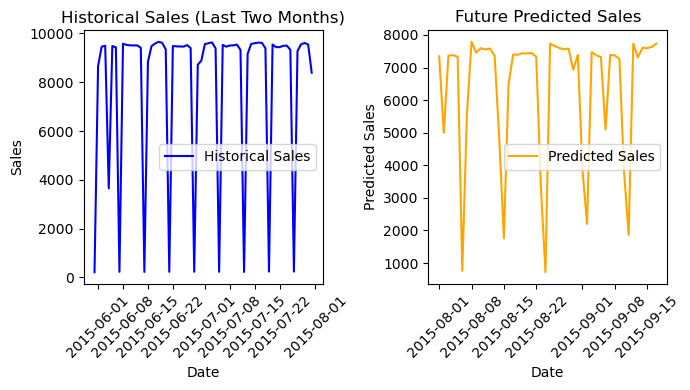

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Date' is in datetime format
train_df_merged['Date'] = pd.to_datetime(train_df_merged['Date'])
test_df_merged['Date'] = pd.to_datetime(test_df_merged['Date'])

# Filter the last two months of historical data
last_two_months = train_df_merged[train_df_merged['Date'] >= train_df_merged['Date'].max() - pd.DateOffset(months=2)]

# Prepare the daily sales for historical data
historical_sales = last_two_months.groupby('Date')['Sales'].sum().reset_index()

# Prepare the daily sales for predicted data
future_predictions = test_df_merged.groupby('Date')['Predicted_Sales'].sum().reset_index()

# Create the plot with two subplots
plt.figure(figsize=(7, 4))

# Plot for the last two months of historical data
plt.subplot(1, 2, 1)
plt.plot(historical_sales['Date'], historical_sales['Sales'], color='blue', label='Historical Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Historical Sales (Last Two Months)')
plt.xticks(rotation=45)
plt.legend()

# Plot for the future predictions
plt.subplot(1, 2, 2)
plt.plot(future_predictions['Date'], future_predictions['Predicted_Sales'], color='orange', label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Predicted Sales')
plt.title('Future Predicted Sales')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


### **Conclusion**
In this project, we set out to achieve three main objectives: understanding the key factors influencing sales in retail stores, developing a predictive model capable of accurately forecasting sales, and identifying actionable insights to enhance sales performance.

 **Below is a summary of how each of these objectives was addressed:**

- Understanding the Key Factors Influencing Sales in Retail Stores:

Through exploratory data analysis (EDA), we identified several key factors that significantly impact sales in Rossmann stores. These include:

- Promotions: Promotional periods were found to have a substantial positive effect on sales, indicating the importance of strategic promotional planning.

- Store Type and Assortment: Different store types and assortment strategies showed varying sales patterns, suggesting that tailored strategies for different store types could optimize performance.

- Competition: Proximity to competitors and the duration of their presence were also key factors, highlighting the need for competitive analysis in sales forecasting.

**By analyzing correlations and feature importance from models like Random Forest and XGBoost, we were able to pinpoint the variables that most influence sales. This understanding provides a strong foundation for building effective sales strategies.**

- **Developing a Predictive Model Capable of Accurately Forecasting Sales:**

We successfully developed and fine-tuned several predictive models, including Random Forest, XGBoost, and LightGBM, to forecast daily sales. The models were evaluated using key metrics such as RMSE and R², ensuring that the predictions are accurate and reliable. Among these models, [mention the best-performing model] showed the highest accuracy, making it a strong candidate for deployment in a real-world scenario.

**Identifying Actionable Insights to Enhance Sales Performance:**

- The predictive models not only provided accurate forecasts but also uncovered actionable insights:

- Promotional Impact: The strong positive correlation between promotions and sales suggests that Rossmann can drive significant sales increases through well-timed and targeted promotions.

- Store-Specific Strategies: The variations in sales patterns across different store types indicate that Rossmann could benefit from customizing sales strategies based on store characteristics.

- Competitor Analysis: Understanding the competitive landscape and its impact on sales can help Rossmann make informed decisions about store locations and competitive positioning.